In [1]:
!pip install datasets pandas pymongo sentence_transformers

In [2]:
!pip install -U transformers accelerate

In [3]:
from datasets import load_dataset

In [4]:
import pandas as pd

In [5]:
#pip install -U datasets

In [6]:
dataset = load_dataset("MongoDB/embedded_movies")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

sample_mflix.embedded_movies.json:   0%|          | 0.00/42.3M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1500 [00:00<?, ? examples/s]

In [7]:
dataset

DatasetDict({
    train: Dataset({
        features: ['plot', 'runtime', 'genres', 'fullplot', 'directors', 'writers', 'countries', 'poster', 'languages', 'cast', 'title', 'num_mflix_comments', 'rated', 'imdb', 'awards', 'type', 'metacritic', 'plot_embedding'],
        num_rows: 1500
    })
})

In [8]:
dataset_df=pd.DataFrame(dataset["train"])

In [9]:
dataset_df.head()

,plot,runtime,genres,fullplot,directors,writers,countries,poster,languages,cast,title,num_mflix_comments,rated,imdb,awards,type,metacritic,plot_embedding
0,Young Pauline is left a lot of money when her ...,199.0,[Action],Young Pauline is left a lot of money when her ...,"[Louis J. Gasnier, Donald MacKenzie]","[Charles W. Goddard (screenplay), Basil Dickey...",[USA],https://m.media-amazon.com/images/M/MV5BMzgxOD...,[English],"[Pearl White, Crane Wilbur, Paul Panzer, Edwar...",The Perils of Pauline,0,None,"{'id': 4465, 'rating': 7.6, 'votes': 744}","{'nominations': 0, 'text': '1 win.', 'wins': 1}",movie,NaN,"[0.0007293965299999999, -0.026834568000000003,..."
1,A penniless young man tries to save an heiress...,22.0,"[Comedy, Short, Action]",As a penniless man worries about how he will m...,"[Alfred J. Goulding, Hal Roach]",[H.M. Walker (titles)],[USA],https://m.media-amazon.com/images/M/MV5BNzE1OW...,[English],"[Harold Lloyd, Mildred Davis, 'Snub' Pollard, ...",From Hand to Mouth,0,TV-G,"{'id': 10146, 'rating': 7.0, 'votes': 639}","{'nominations': 1, 'text': '1 nomination.', 'w...",movie,NaN,"[-0.022837115, -0.022941574000000003, 0.014937..."
2,"Michael ""Beau"" Geste leaves England in disgrac...",101.0,"[Action, Adventure, Drama]","Michael ""Beau"" Geste leaves England in disgrac...",[Herbert Brenon],"[Herbert Brenon (adaptation), John Russell (ad...",[USA],None,[English],"[Ronald Colman, Neil Hamilton, Ralph Forbes, A...",Beau Geste,0,None,"{'id': 16634, 'rating': 6.9, 'votes': 222}","{'nominations': 0, 'text': '1 win.', 'wins': 1}",movie,NaN,"[0.00023330492999999998, -0.028511643000000003..."
3,"Seeking revenge, an athletic young man joins t...",88.0,"[Adventure, Action]",A nobleman vows to avenge the death of his fat...,[Albert Parker],"[Douglas Fairbanks (story), Jack Cunningham (a...",[USA],https://m.media-amazon.com/images/M/MV5BMzU0ND...,None,"[Billie Dove, Tempe Pigott, Donald Crisp, Sam ...",The Black Pirate,1,None,"{'id': 16654, 'rating': 7.2, 'votes': 1146}","{'nominations': 0, 'text': '1 win.', 'wins': 1}",movie,NaN,"[-0.005927917, -0.033394486, 0.0015323418, -0...."
4,An irresponsible young millionaire changes his...,58.0,"[Action, Comedy, Romance]","The Uptown Boy, J. Harold Manners (Lloyd) is a...",[Sam Taylor],"[Ted Wilde (story), John Grey (story), Clyde B...",[USA],https://m.media-amazon.com/images/M/MV5BMTcxMT...,[English],"[Harold Lloyd, Jobyna Ralston, Noah Young, Jim...",For Heaven's Sake,0,PASSED,"{'id': 16895, 'rating': 7.6, 'votes': 918}","{'nominations': 1, 'text': '1 nomination.', 'w...",movie,NaN,"[-0.0059373598, -0.026604708, -0.0070914757000..."


In [10]:
dataset_df.columns

Index(['plot', 'runtime', 'genres', 'fullplot', 'directors', 'writers',
       'countries', 'poster', 'languages', 'cast', 'title',
       'num_mflix_comments', 'rated', 'imdb', 'awards', 'type', 'metacritic',
       'plot_embedding'],
      dtype='object')

In [11]:
dataset_df["plot"][0]

"Young Pauline is left a lot of money when her wealthy uncle dies. However, her uncle's secretary has been named as her guardian until she marries, at which time she will officially take ..."

In [12]:
dataset_df["fullplot"].isnull().sum()

np.int64(48)

In [13]:
dataset_df.isnull().sum()

,0
plot,27
runtime,15
genres,0
fullplot,48
directors,13
writers,13
countries,0
poster,89
languages,1
cast,1


In [14]:
dataset_df=dataset_df.dropna(subset=["fullplot"])

In [15]:
dataset_df["fullplot"].isnull().sum()

np.int64(0)

In [16]:
dataset_df = dataset_df.drop(columns=["plot_embedding"])

In [17]:
dataset_df.head(2)

,plot,runtime,genres,fullplot,directors,writers,countries,poster,languages,cast,title,num_mflix_comments,rated,imdb,awards,type,metacritic
0,Young Pauline is left a lot of money when her ...,199.0,[Action],Young Pauline is left a lot of money when her ...,"[Louis J. Gasnier, Donald MacKenzie]","[Charles W. Goddard (screenplay), Basil Dickey...",[USA],https://m.media-amazon.com/images/M/MV5BMzgxOD...,[English],"[Pearl White, Crane Wilbur, Paul Panzer, Edwar...",The Perils of Pauline,0,None,"{'id': 4465, 'rating': 7.6, 'votes': 744}","{'nominations': 0, 'text': '1 win.', 'wins': 1}",movie,NaN
1,A penniless young man tries to save an heiress...,22.0,"[Comedy, Short, Action]",As a penniless man worries about how he will m...,"[Alfred J. Goulding, Hal Roach]",[H.M. Walker (titles)],[USA],https://m.media-amazon.com/images/M/MV5BNzE1OW...,[English],"[Harold Lloyd, Mildred Davis, 'Snub' Pollard, ...",From Hand to Mouth,0,TV-G,"{'id': 10146, 'rating': 7.0, 'votes': 639}","{'nominations': 1, 'text': '1 nomination.', 'w...",movie,NaN


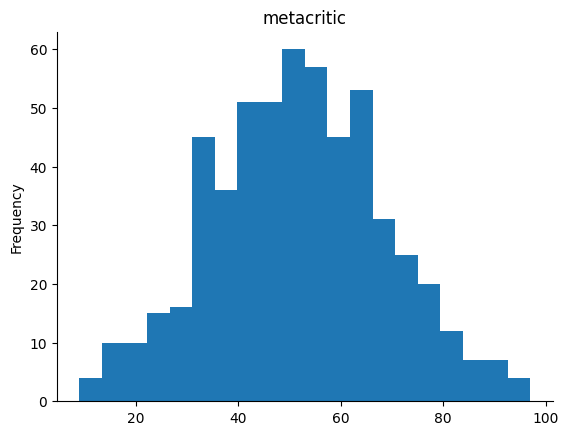

In [18]:
from matplotlib import pyplot as plt
dataset_df['metacritic'].plot(kind='hist', bins=20, title='metacritic')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [19]:
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer("thenlper/gte-large")

modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/619 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/670M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

In [20]:
def get_embedding(text:str)->list[float]:

  if not text.strip():
    print("attempted to get embedding for empty text.")
    return []

  embedding=embedding_model.encode(text)
  return embedding.tolist()

In [21]:
dataset_df["embedding"]=dataset_df["fullplot"].apply(get_embedding)

In [22]:
import pymongo

In [23]:

from pymongo.mongo_client import MongoClient
from pymongo.server_api import ServerApi

uri = "mongodb+srv://<your username>:<password>@cluster0.9cktzei.mongodb.net/?retryWrites=true&w=majority&appName=Cluster0"

# Create a new client and connect to the server
client = MongoClient(uri, server_api=ServerApi('1'))

# Send a ping to confirm a successful connection
try:
    client.admin.command('ping')
    print("Pinged your deployment. You successfully connected to MongoDB!")
except Exception as e:
    print(e)

Pinged your deployment. You successfully connected to MongoDB!


In [24]:
db = client['mongorag']

In [25]:
collection = db["mongoragcollection"]

In [26]:
document=dataset_df.to_dict("records")

In [27]:
collection.insert_many(document)

InsertManyResult([ObjectId('685fabff3cb729ba62ce7b55'), ObjectId('685fabff3cb729ba62ce7b56'), ObjectId('685fabff3cb729ba62ce7b57'), ObjectId('685fabff3cb729ba62ce7b58'), ObjectId('685fabff3cb729ba62ce7b59'), ObjectId('685fabff3cb729ba62ce7b5a'), ObjectId('685fabff3cb729ba62ce7b5b'), ObjectId('685fabff3cb729ba62ce7b5c'), ObjectId('685fabff3cb729ba62ce7b5d'), ObjectId('685fabff3cb729ba62ce7b5e'), ObjectId('685fabff3cb729ba62ce7b5f'), ObjectId('685fabff3cb729ba62ce7b60'), ObjectId('685fabff3cb729ba62ce7b61'), ObjectId('685fabff3cb729ba62ce7b62'), ObjectId('685fabff3cb729ba62ce7b63'), ObjectId('685fabff3cb729ba62ce7b64'), ObjectId('685fabff3cb729ba62ce7b65'), ObjectId('685fabff3cb729ba62ce7b66'), ObjectId('685fabff3cb729ba62ce7b67'), ObjectId('685fabff3cb729ba62ce7b68'), ObjectId('685fabff3cb729ba62ce7b69'), ObjectId('685fabff3cb729ba62ce7b6a'), ObjectId('685fabff3cb729ba62ce7b6b'), ObjectId('685fabff3cb729ba62ce7b6c'), ObjectId('685fabff3cb729ba62ce7b6d'), ObjectId('685fabff3cb729ba62ce7b

In [28]:
{
 "fields": [{
     "numDimensions": 1024,
     "path": "embedding",
     "similarity": "cosine",
     "type": "vector"
   }]
}

{'fields': [{'numDimensions': 1024,
   'path': 'embedding',
   'similarity': 'cosine',
   'type': 'vector'}]}

In [29]:
user_query="what is the best horror movie?"

In [30]:
query_embedding=get_embedding(user_query)

In [31]:
query_embedding

[0.0320083312690258,
 -0.016375768929719925,
 -0.03466121852397919,
 0.001408362528309226,
 -0.0016439368482679129,
 -0.01220843754708767,
 -0.015490742400288582,
 0.04027732089161873,
 -0.008300934918224812,
 0.027359437197446823,
 0.032420944422483444,
 -0.007007700391113758,
 0.014090868644416332,
 -0.032076358795166016,
 -0.008688433095812798,
 -0.02813737653195858,
 -0.035497479140758514,
 -0.02312837354838848,
 -0.021521832793951035,
 0.010077069513499737,
 -0.008985675871372223,
 0.006707658991217613,
 -0.06067965552210808,
 -0.013847105205059052,
 -0.02073209546506405,
 0.016766943037509918,
 0.02398812398314476,
 -0.011809693649411201,
 0.036733228713274,
 0.08142602443695068,
 0.00792068149894476,
 -0.041727013885974884,
 0.0431947261095047,
 -0.03834754601120949,
 -0.028009740635752678,
 -0.01896689459681511,
 0.06600959599018097,
 -0.0005763377994298935,
 -0.021067503839731216,
 -0.03700760751962662,
 0.020190631970763206,
 0.002797145629301667,
 0.05587851628661156,
 -0.00

In [32]:
print(query_embedding)

[0.0320083312690258, -0.016375768929719925, -0.03466121852397919, 0.001408362528309226, -0.0016439368482679129, -0.01220843754708767, -0.015490742400288582, 0.04027732089161873, -0.008300934918224812, 0.027359437197446823, 0.032420944422483444, -0.007007700391113758, 0.014090868644416332, -0.032076358795166016, -0.008688433095812798, -0.02813737653195858, -0.035497479140758514, -0.02312837354838848, -0.021521832793951035, 0.010077069513499737, -0.008985675871372223, 0.006707658991217613, -0.06067965552210808, -0.013847105205059052, -0.02073209546506405, 0.016766943037509918, 0.02398812398314476, -0.011809693649411201, 0.036733228713274, 0.08142602443695068, 0.00792068149894476, -0.041727013885974884, 0.0431947261095047, -0.03834754601120949, -0.028009740635752678, -0.01896689459681511, 0.06600959599018097, -0.0005763377994298935, -0.021067503839731216, -0.03700760751962662, 0.020190631970763206, 0.002797145629301667, 0.05587851628661156, -0.009170624427497387, -0.04668894782662392, -0.

In [33]:
pipeline = [

    {
        "$vectorSearch": {
            "index": "vector_index",
            "queryVector": query_embedding,
            "path": "embedding",
            "numCandidates": 150,  # Number of candidate matches to consider
            "limit": 4,  # Return top 4 matches
        }
    },
    {
        "$project": {
            "fullplot": 1,  # Include the plot field
            "title": 1,  # Include the title field
            "genres": 1,  # Include the genres field
            "score": {"$meta": "vectorSearchScore"},  # Include the search score
        }
    }
]

In [34]:
collection.aggregate(pipeline)

In [35]:
list(collection.aggregate(pipeline))

[{'_id': ObjectId('685ea4ee1e5de3834c618b08'),
  'genres': ['Action', 'Horror', 'Thriller'],
  'fullplot': 'The "sematary" is up to its old zombie-raising tricks again. This time, the protagonists are Jeff Matthews, whose mother died in a Hollywood stage accident, and Drew Gilbert, a boy coping with an abusive stepfather.',
  'title': 'Pet Sematary II',
  'score': 0.9100869297981262},
 {'_id': ObjectId('685e9d6ef9b4d6d07d7d29e2'),
  'genres': ['Action', 'Horror', 'Thriller'],
  'fullplot': 'The "sematary" is up to its old zombie-raising tricks again. This time, the protagonists are Jeff Matthews, whose mother died in a Hollywood stage accident, and Drew Gilbert, a boy coping with an abusive stepfather.',
  'title': 'Pet Sematary II',
  'score': 0.9100869297981262},
 {'_id': ObjectId('685ec341077acbf776da64f4'),
  'genres': ['Action', 'Horror', 'Thriller'],
  'fullplot': 'The "sematary" is up to its old zombie-raising tricks again. This time, the protagonists are Jeff Matthews, whose mo

In [36]:
def get_embedding(text:str)->list[float]:

  if not text.strip():
    print("attempted to get embedding for empty text.")
    return []

  embedding=embedding_model.encode(text)
  return embedding.tolist()


In [37]:
def vector_search(user_query,collection):

  query_embedding=get_embedding(user_query)
  print(query_embedding)

  if query_embedding is None:
    return "Invalid query or embeddig is failed"

  pipeline=[

            {
                "$vectorSearch":{

                "index": "vector_index",
                "queryVector": query_embedding,
                "path": "embedding",
                "numCandidates": 150,  # Number of candidate matches to consider
                "limit": 4,  # Return top 4 matches


                }

            },

              {
                 "$project":{

                "fullplot": 1,  # Include the plot field
                "title": 1,  # Include the title field
                "genres": 1,  # Include the genres field
                "score": {"$meta": "vectorSearchScore"},  # Include the search score
                 }

            }

           ]

  result=collection.aggregate(pipeline)
  return list(result)


In [38]:
vector_search("what is the best horror movie to watch and why?",collection)

[0.019185977056622505, -0.01547294668853283, -0.03955464065074921, 0.0023692904505878687, -0.002659196499735117, 0.005181792192161083, -0.0075131980702281, 0.04510665312409401, -0.018112152814865112, 0.042973391711711884, 0.013434062711894512, -0.002870825817808509, 0.0054796673357486725, -0.031249191612005234, -0.004083299543708563, -0.031060393899679184, -0.04105725139379501, -0.03010973148047924, -0.032163672149181366, 0.027480388060212135, -0.003167531220242381, 0.016843508929014206, -0.04414495825767517, -0.023998169228434563, -0.01558179035782814, 0.01787446066737175, 0.021615227684378624, -0.030424680560827255, 0.04588266834616661, 0.07223066687583923, 0.0023236724082380533, -0.04596638306975365, 0.02617713436484337, -0.04897381365299225, -0.03348347544670105, -0.010095011442899704, 0.0548892579972744, 0.00158393825404346, -0.0027255003806203604, -0.03803258016705513, 0.016657156869769096, 0.014302369207143784, 0.04556025192141533, -0.011216191574931145, -0.050463683903217316, 0

[{'_id': ObjectId('685ea4ee1e5de3834c618b08'),
  'genres': ['Action', 'Horror', 'Thriller'],
  'fullplot': 'The "sematary" is up to its old zombie-raising tricks again. This time, the protagonists are Jeff Matthews, whose mother died in a Hollywood stage accident, and Drew Gilbert, a boy coping with an abusive stepfather.',
  'title': 'Pet Sematary II',
  'score': 0.9052296280860901},
 {'_id': ObjectId('685e9d6ef9b4d6d07d7d29e2'),
  'genres': ['Action', 'Horror', 'Thriller'],
  'fullplot': 'The "sematary" is up to its old zombie-raising tricks again. This time, the protagonists are Jeff Matthews, whose mother died in a Hollywood stage accident, and Drew Gilbert, a boy coping with an abusive stepfather.',
  'title': 'Pet Sematary II',
  'score': 0.9052296280860901},
 {'_id': ObjectId('685ec341077acbf776da64f4'),
  'genres': ['Action', 'Horror', 'Thriller'],
  'fullplot': 'The "sematary" is up to its old zombie-raising tricks again. This time, the protagonists are Jeff Matthews, whose mo

In [39]:
def get_search_result(query,collection):

  get_knowledge=vector_search(query,collection)

  search_result=""

  for result in get_knowledge:
        search_result += f"Title: {result.get('title', 'N/A')}, Plot: {result.get('fullplot', 'N/A')}\n"

  return search_result



In [40]:
query="what is the best comedy movie to watch and why?"

In [41]:
collection

Collection(Database(MongoClient(host=['ac-34c5dtn-shard-00-00.9cktzei.mongodb.net:27017', 'ac-34c5dtn-shard-00-01.9cktzei.mongodb.net:27017', 'ac-34c5dtn-shard-00-02.9cktzei.mongodb.net:27017'], document_class=dict, tz_aware=False, connect=True, retrywrites=True, w='majority', appname='Cluster0', authsource='admin', replicaset='atlas-mgqudn-shard-0', tls=True, server_api=<pymongo.server_api.ServerApi object at 0x79082ce88890>), 'mongorag'), 'mongoragcollection')

In [42]:
source_information=get_search_result(query,collection)

[0.01965293474495411, -0.023518932983279228, -0.03145848959684372, 0.014970563352108002, -0.016353150829672813, -0.016895774751901627, -0.011936463415622711, 0.04158833250403404, -0.013356580398976803, 0.044313620775938034, 0.004574724938720465, 0.010549061931669712, 0.012763161212205887, -0.048285387456417084, 0.005650663282722235, -0.031372006982564926, -0.037548549473285675, -0.03725144639611244, -0.02974022924900055, 0.019366946071386337, 0.004532270599156618, 0.016592098399996758, -0.034319791942834854, -0.009278474375605583, 0.008219528943300247, 0.020317645743489265, -0.009512982331216335, 0.0006080022430978715, 0.05204164236783981, 0.07381505519151688, 0.012975163757801056, -0.05585033819079399, 0.01898007094860077, -0.06078890711069107, 0.011161554604768753, -0.03324289619922638, 0.026351863518357277, 0.018502039834856987, -0.011724861338734627, -0.04501267150044441, -0.03618020564317703, -0.021296020597219467, 0.038623660802841187, -0.027672821655869484, -0.05561940371990204,

In [43]:
source_information

'Title: Fight Back to School, Plot: (Cantonese with English subtitles) Classic, slapstick, all-out-ridiculous Hong Kong action-comedy delivered by the one-and-only Stephen Chow (Kung Fu Hustle, Shaolin Soccer), who plays a SWAT team leader going undercover at a high school to retrieve a stolen gun for his captain.\nTitle: Fight Back to School, Plot: (Cantonese with English subtitles) Classic, slapstick, all-out-ridiculous Hong Kong action-comedy delivered by the one-and-only Stephen Chow (Kung Fu Hustle, Shaolin Soccer), who plays a SWAT team leader going undercover at a high school to retrieve a stolen gun for his captain.\nTitle: Fight Back to School, Plot: (Cantonese with English subtitles) Classic, slapstick, all-out-ridiculous Hong Kong action-comedy delivered by the one-and-only Stephen Chow (Kung Fu Hustle, Shaolin Soccer), who plays a SWAT team leader going undercover at a high school to retrieve a stolen gun for his captain.\nTitle: The Last Man, Plot: Apocalyptic comedy finds

In [44]:
combined_information = f"Query: {query}\nContinue to answer the query by using the Search Results:\n{source_information}."

print(combined_information)

Query: what is the best comedy movie to watch and why?
Continue to answer the query by using the Search Results:
Title: Fight Back to School, Plot: (Cantonese with English subtitles) Classic, slapstick, all-out-ridiculous Hong Kong action-comedy delivered by the one-and-only Stephen Chow (Kung Fu Hustle, Shaolin Soccer), who plays a SWAT team leader going undercover at a high school to retrieve a stolen gun for his captain.
Title: Fight Back to School, Plot: (Cantonese with English subtitles) Classic, slapstick, all-out-ridiculous Hong Kong action-comedy delivered by the one-and-only Stephen Chow (Kung Fu Hustle, Shaolin Soccer), who plays a SWAT team leader going undercover at a high school to retrieve a stolen gun for his captain.
Title: Fight Back to School, Plot: (Cantonese with English subtitles) Classic, slapstick, all-out-ridiculous Hong Kong action-comedy delivered by the one-and-only Stephen Chow (Kung Fu Hustle, Shaolin Soccer), who plays a SWAT team leader going undercover a

In [45]:
HF_TOKEN = "hf_"

In [46]:
from huggingface_hub import notebook_login
notebook_login()

In [49]:
from transformers import AutoTokenizer,AutoModelForCausalLM
tokenizer = AutoTokenizer.from_pretrained("google/gemma-2b-it")

tokenizer_config.json:   0%|          | 0.00/34.2k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

In [50]:
model = AutoModelForCausalLM.from_pretrained("google/gemma-2b-it",device_map="auto")

config.json:   0%|          | 0.00/627 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/67.1M [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

In [51]:
# Moving tensors to GPU
input_ids = tokenizer(combined_information, return_tensors="pt").to("cuda")

In [52]:
response = model.generate(**input_ids, max_new_tokens=500)

In [53]:
print(tokenizer.decode(response[0]))

<bos>Query: what is the best comedy movie to watch and why?
Continue to answer the query by using the Search Results:
Title: Fight Back to School, Plot: (Cantonese with English subtitles) Classic, slapstick, all-out-ridiculous Hong Kong action-comedy delivered by the one-and-only Stephen Chow (Kung Fu Hustle, Shaolin Soccer), who plays a SWAT team leader going undercover at a high school to retrieve a stolen gun for his captain.
Title: Fight Back to School, Plot: (Cantonese with English subtitles) Classic, slapstick, all-out-ridiculous Hong Kong action-comedy delivered by the one-and-only Stephen Chow (Kung Fu Hustle, Shaolin Soccer), who plays a SWAT team leader going undercover at a high school to retrieve a stolen gun for his captain.
Title: Fight Back to School, Plot: (Cantonese with English subtitles) Classic, slapstick, all-out-ridiculous Hong Kong action-comedy delivered by the one-and-only Stephen Chow (Kung Fu Hustle, Shaolin Soccer), who plays a SWAT team leader going underco